# Proejct Preliminary Work - week 7

In [1]:
import numpy as np
import os
import struct
import requests

In [2]:
def get_number(byte):
    return int.from_bytes(byte, "big")
def parse_images(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        image_count = get_number(f.read(4))
        rows = get_number(f.read(4))
        cols = get_number(f.read(4))
        print("rows: ", rows, "cols", cols);
        images = np.zeros((image_count, rows, cols))

        current_img = 0
        current_row = 0
        current_col = 0

        while current_img < image_count:
            num = get_number(f.read(1))
            images[current_img, current_row, current_col] = num

            if current_row == rows - 1 and current_col == cols - 1:
                current_img += 1
                current_row = 0
                current_col = 0
            elif current_col == cols - 1:
                current_row += 1
                current_col = 0
            else:
                current_col += 1
    return images
def parse_labels(file_path):
    with open(file_path, "rb") as f:
        magic_num = get_number(f.read(4))
        label_count = get_number(f.read(4))

        labels = np.zeros((label_count))
        current_label = 0

        while current_label < label_count:
            num = get_number(f.read(1))
            labels[current_label] = num
            current_label += 1

        return labels
def parse_data():
    train_images_path =os.path.abspath("./Data/mnist/train-images-idx3-ubyte")
    test_images_path = os.path.abspath("./Data/mnist/t10k-images-idx3-ubyte")

    train_labels_path =os.path.abspath("./Data/mnist/train-labels-idx1-ubyte")
    test_labels_path = os.path.abspath("./Data/mnist/t10k-labels-idx1-ubyte")

    x_train = parse_images(train_images_path)
    y_train = parse_labels(train_labels_path)

    x_test = parse_images(test_images_path)
    y_test = parse_labels(test_labels_path)

    return (x_train, y_train), (x_test, y_test)

In [3]:
(x_train, y_train), (x_test, y_test) = parse_data()

rows:  28 cols 28
rows:  28 cols 28


In [4]:
def printIMG(index):
    for a in range(28):
        for b in range(28):
            print(1 if x_train[index][a][b] > 50 else 0, end=" ")
        print(" ")


In [5]:
for i in range(5):
    printIMG(1)
    print()


0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0  
0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0  
0 0 0 0 0 0 1 

In [6]:
import pandas as pd
x = y_train.reshape(-1,1)
dataframe = pd.DataFrame.from_records(x)
dataframe = dataframe.rename(columns={0:'digit'})
dataframe

,digit
0,5.0
1,0.0
2,4.0
3,1.0
4,9.0
...,...
59995,8.0
59996,3.0
59997,5.0
59998,6.0


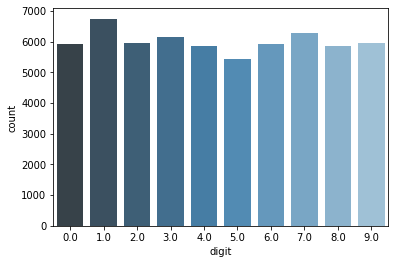

In [9]:
import seaborn as sns
ax = sns.countplot(x=dataframe.iloc[:,0], data=dataframe, palette='Blues_d')
fig = ax.get_figure()
fig.savefig("./Data/train_digit.png")
ax

In [8]:
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0.0: 5923,
 1.0: 6742,
 2.0: 5958,
 3.0: 6131,
 4.0: 5842,
 5.0: 5421,
 6.0: 5918,
 7.0: 6265,
 8.0: 5851,
 9.0: 5949}